### Data Loading

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [2]:
sig = True
zscore = False

Load in S14 Data

In [3]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore)

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


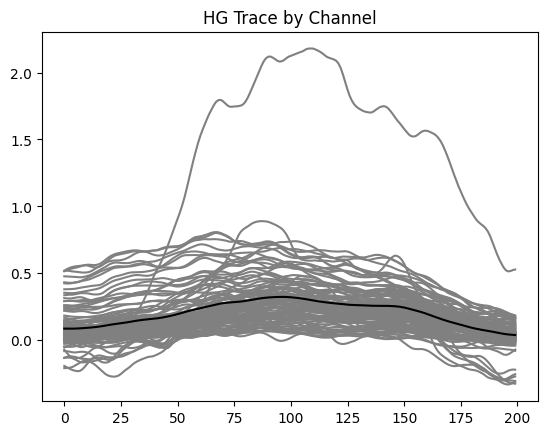

In [4]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S14_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S14_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S26 Data

In [5]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore)

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


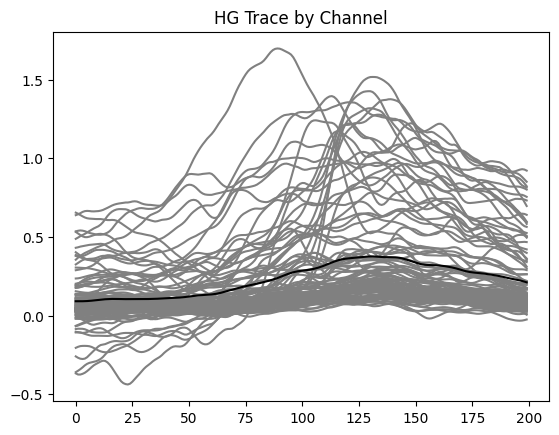

In [6]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S23 Data

In [7]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore)

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


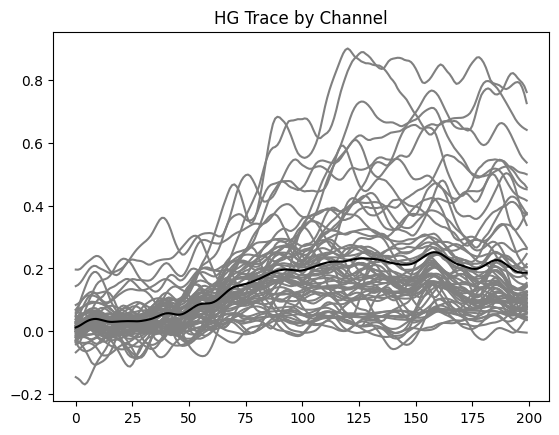

In [8]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S33 Data

In [9]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore)

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


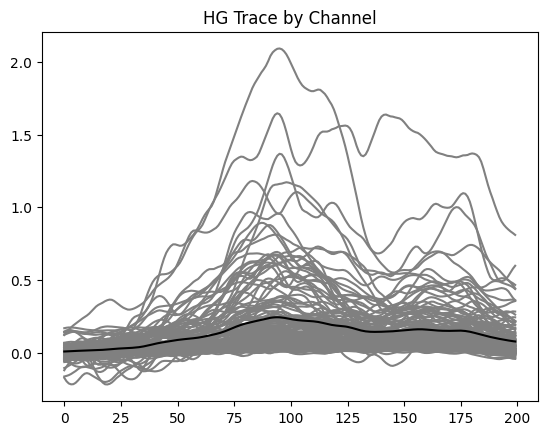

In [10]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Process data for use with 1/3 D CNN Bidirectional LSTM seq2seq

In [11]:
# imports
from processing_utils.sequence_processing import pad_sequence_teacher_forcing

In [12]:
# parameters
n_output = 10

In [13]:
X1 = S14_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X1 = S14_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X1_prior, y1, prior1_labels, seq1_labels = pad_sequence_teacher_forcing(S14_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [14]:
print(X1.shape, X1_prior.shape, y1.shape, prior1_labels.shape, seq1_labels.shape)

(144, 200, 111) (144, 3, 10) (144, 3, 10) (144, 3) (144, 3)


In [15]:
X2 = S26_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S26_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X2_prior, y2, prior2_labels, seq2_labels = pad_sequence_teacher_forcing(S26_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [16]:
print(X2.shape, X2_prior.shape, y2.shape, prior2_labels.shape, seq2_labels.shape)

(148, 200, 111) (148, 3, 10) (148, 3, 10) (148, 3) (148, 3)


In [17]:
X3 = S23_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S23_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X3_prior, y3, prior3_labels, seq3_labels = pad_sequence_teacher_forcing(S23_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [18]:
print(X3.shape, X3_prior.shape, y3.shape, prior3_labels.shape, seq3_labels.shape)

(151, 200, 63) (151, 3, 10) (151, 3, 10) (151, 3) (151, 3)


In [19]:
X4 = S33_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S33_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X4_prior, y4, prior4_labels, seq4_labels = pad_sequence_teacher_forcing(S33_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [20]:
print(X4.shape, X4_prior.shape, y4.shape, prior4_labels.shape, seq4_labels.shape)

(46, 200, 149) (46, 3, 10) (46, 3, 10) (46, 3) (46, 3)


Build 1D CNN Bidirectional LSTM seq2seq Model

In [21]:
# imports
from seq2seq_models.rnn_models import (lstm_1Dcnn_model, gru_1Dcnn_model,
                                       lstm_3Dcnn_model, gru_3Dcnn_model,
                                       stacked_lstm_1Dcnn_model)

In [22]:
# parameters

# 1D CNN
n_input_time = X1.shape[1]
n_input_channel = X1.shape[2]
filter_size = 10

# 3D CNN
# n_input_channel = [X1.shape[1], X1.shape[2]]
# n_input_time = X1.shape[3]
# filter_size = 2

n_filters = 50
n_layers = 1
n_units = 256
reg_lambda = 1e-6
dropout = 0.33
bidir = True

In [23]:
train_model, inf_enc, inf_dec = stacked_lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_layers, n_units, reg_lambda, bidir=bidir)

In [ ]:
print(train_model.summary())
# print(train_model.layers[-1].summary())
# print(inf_enc.summary())
# print(inf_enc.layers[-1].summary())
# print(inf_dec.summary())

### Testing replacement of input and conv layers

In [ ]:
from seq2seq_models.rnn_model_components import linear_cnn_1D_module
n_channels = 17
conv_layer_idx = 1

input_layer = train_model.layers[conv_layer_idx - 1]
conv_layer = train_model.layers[conv_layer_idx]
reg_val = float(conv_layer.kernel_regularizer.l2)
new_inputs, new_conv_layer = linear_cnn_1D_module(
                                    input_layer.input_shape[0][1],
                                    n_channels, conv_layer.filters,
                                    conv_layer.kernel_size,
                                    reg_val)

In [ ]:
from keras.models import Model

encoder_inputs = new_conv_layer(new_inputs)
enc_dec = train_model.layers[-1]
new_model = Model([new_inputs, enc_dec.input[1]], enc_dec([encoder_inputs, enc_dec.input[1]]), name='new_model')

In [ ]:
new_model.summary()

### S26 Evaluation

In [ ]:
import time
from keras.optimizers import Adam
from train.train import train_seq2seq_kfold

In [ ]:
# parameters
num_folds = 10
num_reps = 1
batch_size = 200
epochs = 500
learning_rate = 5e-6

In [ ]:
train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
histories, y_pred_all, y_test_all = train_seq2seq_kfold(train_model, inf_enc, inf_dec, X2, X2_prior, y2,
                                                        num_folds=num_folds, num_reps=num_reps,
                                                        batch_size=batch_size, epochs=epochs,
                                                        early_stop=False)
end = time.time()

In [ ]:
print(f'Time to train {num_folds} folds: {end-start} seconds')

In [ ]:
from visualization.plot_model_performance import extend_history_lists

histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f'Balanced Accuracy: {balanced_accuracy_score(y_test_all, y_pred_all)}')

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories, epochs=epochs)

### S33 Evaluation

In [ ]:
n_input_channel_transfer = X2.shape[2]
new_model, new_enc, new_dec = lstm_1Dcnn_model(n_input_time, n_input_channel_transfer,
                                               n_output, n_filters, filter_size, n_units,
                                               reg_lambda, bidir=bidir)

In [ ]:
from keras.optimizers import Adam

num_folds = 5
num_reps = 3
batch_size = 200
epochs = 500
learning_rate = 5e-6

new_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from train.train import train_seq2seq_kfold

histories, y_pred_all, y_test_all = train_seq2seq_kfold(new_model, new_enc, new_dec, X2, X2_prior, y2,
                                                        num_folds=num_folds, num_reps=num_reps,
                                                        batch_size=batch_size, epochs=epochs,
                                                        early_stop=False)

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f'Balanced Accuracy: {balanced_accuracy_score(y_test_all, y_pred_all)}')

### Transfer Training S14 -> S26

In [ ]:
# imports
from keras.optimizers import Adam
from train.transfer_training import transfer_seq2seq_kfold

In [ ]:
trans_model, trans_enc, trans_dec = lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)
# trans_model, trans_enc, trans_dec = lstm_3Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)
# trans_model, trans_enc, trans_dec = gru_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)

In [ ]:
# parameters
num_folds = 5
batch_size = 200
epochs = 540
learning_rate = 1e-5

trans_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
models, histories, y_pred_all, y_test_all = transfer_seq2seq_kfold(trans_model, trans_enc, trans_dec, X1, X1_prior, y1, X2, X2_prior, y2, num_folds=num_folds, fine_tune_epochs=epochs)

In [ ]:
# from visualization.plot_model_performance import extend_t_hist_lists

# histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories, epochs=epochs)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced Accuracy: ', balanced_accuracy_score(y_test_all, y_pred_all))

### Transfer Training S26 -> S14

In [ ]:
# imports
from keras.optimizers import Adam
from train.transfer_training import transfer_seq2seq_kfold

In [ ]:
trans_model, trans_enc, trans_dec = lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir)

In [ ]:
# parameters
num_folds = 5
batch_size = 200
# epochs = 500
learning_rate = 5e-6

trans_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
models2, histories2, y_pred2_all, y_test2_all = transfer_seq2seq_kfold(trans_model, trans_enc, trans_dec, X2, X2_prior, y2, X1, X1_prior, y1, num_folds=num_folds)

In [ ]:
# from visualization.plot_model_performance import extend_history_lists

# histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories2['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories2['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories2['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories2['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories2['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories2['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories2['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories2['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories2, epochs=540)

### Transfer Training Diff Chans

In [ ]:
from train.transfer_training import transfer_seq2seq_kfold_diff_chans

In [ ]:
n_input_channel_transfer = X2.shape[2]
new_model, new_enc, new_dec = stacked_lstm_1Dcnn_model(n_input_time, n_input_channel_transfer,
                                                       n_output, n_filters, filter_size, n_layers,
                                                       n_units, reg_lambda, bidir=bidir)
new_model.summary()

In [ ]:
from keras.optimizers import Adam

num_folds = 5
batch_size = 200
pre_epochs = 3
c_epochs = 2
ft_epochs = 5
learning_rate = 1e-3

train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
new_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
histories2, y_pred2_all, y_test2_all = transfer_seq2seq_kfold_diff_chans(train_model, inf_enc, inf_dec, new_model,
                                                                         new_enc, new_dec, X1, X1_prior, y1, X2,
                                                                         X2_prior, y2, num_folds=num_folds,
                                                                         pretrain_epochs=pre_epochs,
                                                                         conv_epochs=c_epochs,
                                                                         fine_tune_epochs=ft_epochs)

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories2, epochs=pre_epochs + c_epochs + ft_epochs)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced Accuracy: ', balanced_accuracy_score(y_test2_all, y_pred2_all))

### Transfer Train Chain

In [24]:
from train.transfer_training import transfer_train_chain

In [25]:
from keras.optimizers import Adam

num_folds = 10
batch_size = 200
pre_epochs = 3
c_epochs = 2
ft_epochs = 5
learning_rate = 1e-3

train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

##### Regular training

Model: "training_lstm_initial"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20, 50)]     0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 512),        628736      ['input_3[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                              

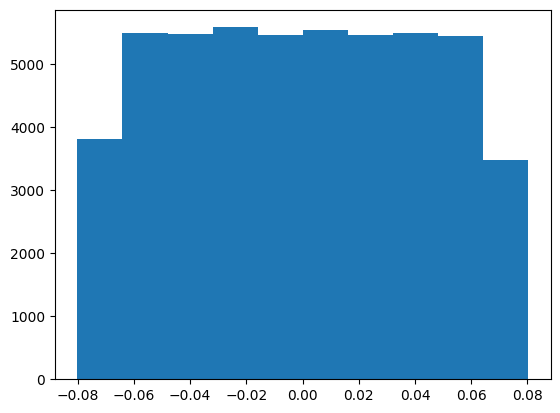

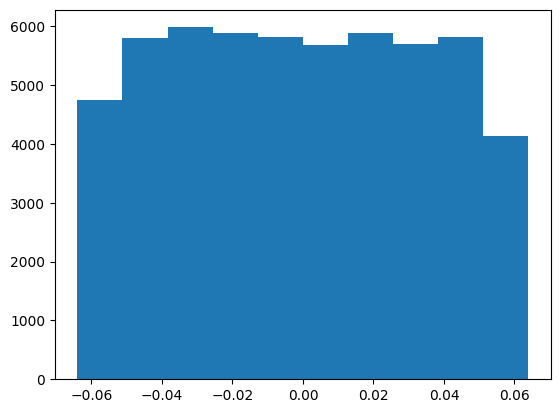

Epoch 1/3
1/1 [==============================] - 0s 451ms/step - loss: 2.0782 - accuracy: 0.2384 - val_loss: 2.0446 - val_accuracy: 0.2523 - seq2seq_val_loss: 2.0516 - seq2seq_val_accuracy: 0.2229
Epoch 2/3
1/1 [==============================] - 0s 360ms/step - loss: 2.0446 - accuracy: 0.2523 - val_loss: 2.0243 - val_accuracy: 0.2894 - seq2seq_val_loss: 2.0326 - seq2seq_val_accuracy: 0.2550
Epoch 3/3
1/1 [==============================] - 0s 366ms/step - loss: 2.0243 - accuracy: 0.2894 - val_loss: 1.9903 - val_accuracy: 0.2847 - seq2seq_val_loss: 2.0003 - seq2seq_val_accuracy: 0.2570


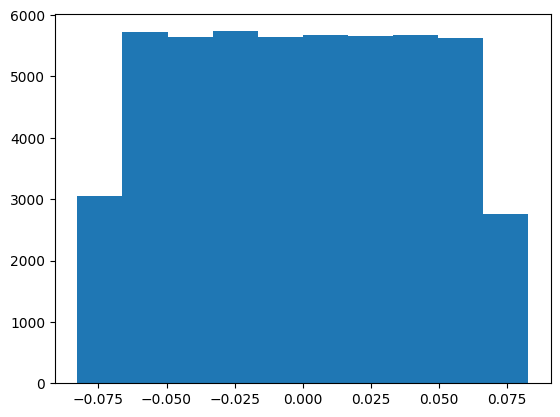

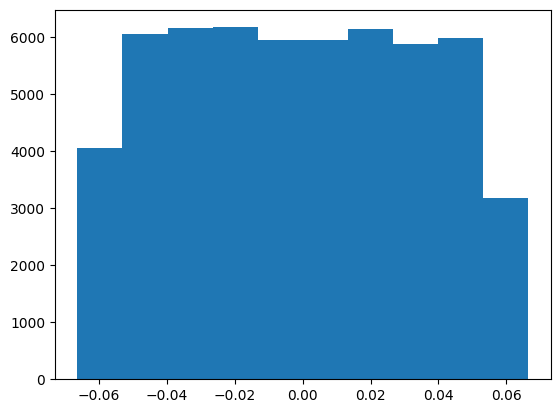

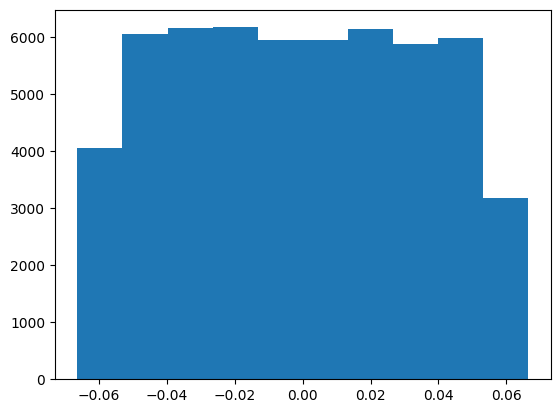

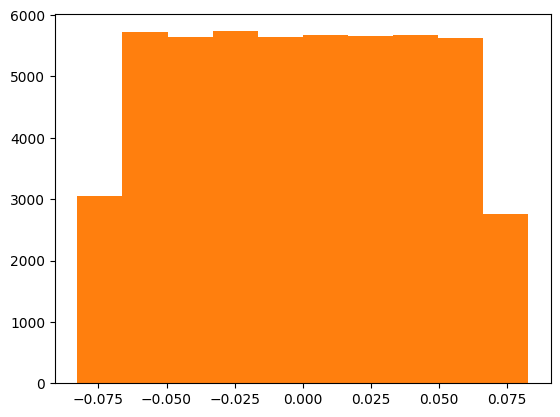

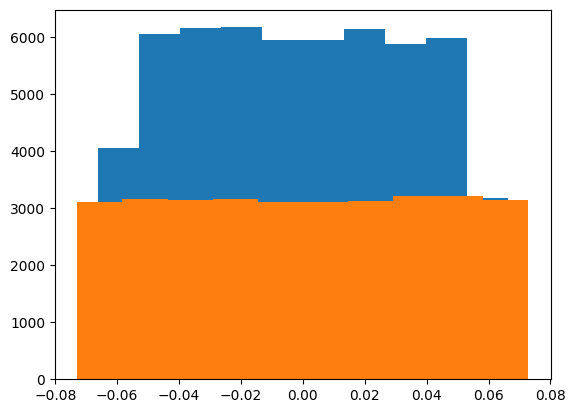

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 200, 63)]    0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 20, 50)       31550       ['input_9[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None, 10)]   0           []                               
                                                                                                  
 training_lstm_initial (Functio  (None, None, 10)    904714      ['conv1d_3[0][0]',               
 nal)                                                             'input_2[0][0]']          

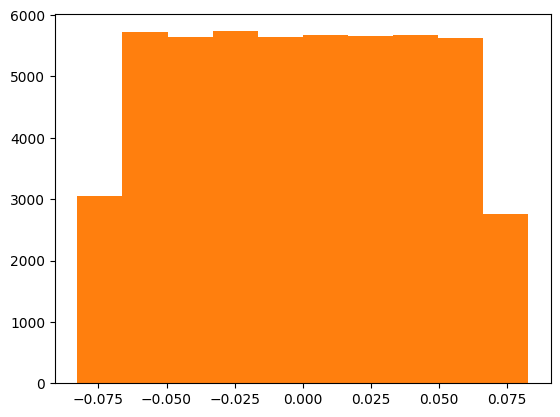

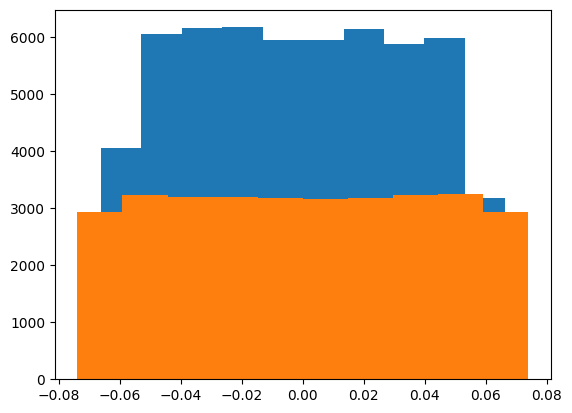

Epoch 1/3
1/1 [==============================] - 10s 10s/step - loss: 2.1826 - accuracy: 0.1369 - val_loss: 2.1545 - val_accuracy: 0.1810 - seq2seq_val_loss: 2.1646 - seq2seq_val_accuracy: 0.1416
Epoch 2/3
1/1 [==============================] - 0s 373ms/step - loss: 2.1545 - accuracy: 0.1810 - val_loss: 2.1226 - val_accuracy: 0.1965 - seq2seq_val_loss: 2.1346 - seq2seq_val_accuracy: 0.1479
Epoch 3/3
1/1 [==============================] - 0s 430ms/step - loss: 2.1226 - accuracy: 0.1965 - val_loss: 2.0932 - val_accuracy: 0.1943 - seq2seq_val_loss: 2.1070 - seq2seq_val_accuracy: 0.1673


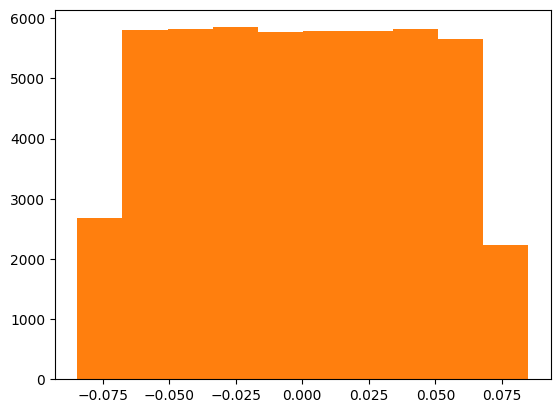

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 200, 63)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 20, 50)            31550     
                                                                 
 inf_enc_lstm_initial (Funct  [(None, 256),            628736    
 ional)                       (None, 256)]                       
                                                                 
Total params: 660,286
Trainable params: 660,286
Non-trainable params: 0
_________________________________________________________________
Model: "inf_enc_lstm_initial"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)  

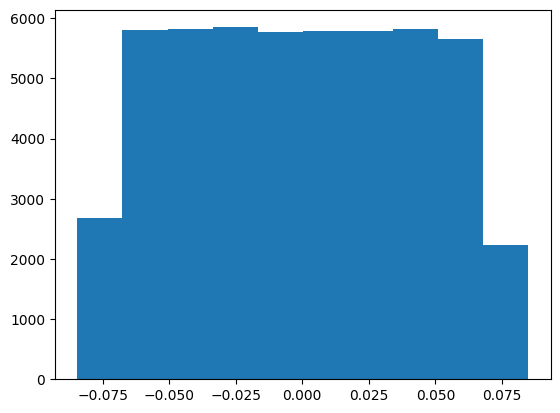

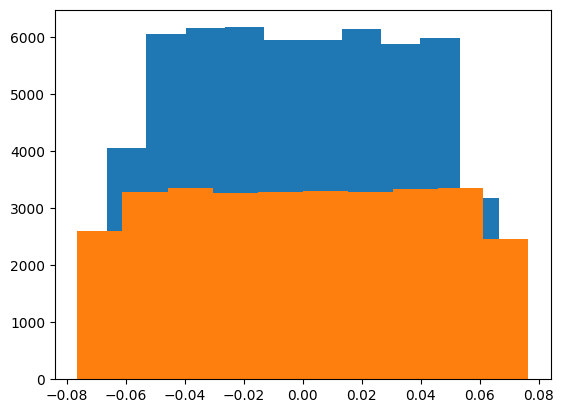

Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 2.2497 - accuracy: 0.1812 - val_loss: 2.1777 - val_accuracy: 0.1957 - seq2seq_val_loss: 2.1898 - seq2seq_val_accuracy: 0.1313
Epoch 2/2
1/1 [==============================] - 0s 233ms/step - loss: 2.1777 - accuracy: 0.1957 - val_loss: 2.1330 - val_accuracy: 0.2246 - seq2seq_val_loss: 2.1465 - seq2seq_val_accuracy: 0.1825
Epoch 1/3
1/1 [==============================] - 9s 9s/step - loss: 2.1330 - accuracy: 0.2246 - val_loss: 2.0789 - val_accuracy: 0.2246 - seq2seq_val_loss: 2.0950 - seq2seq_val_accuracy: 0.1839
Epoch 2/3
1/1 [==============================] - 0s 245ms/step - loss: 2.0789 - accuracy: 0.2246 - val_loss: 2.0396 - val_accuracy: 0.2536 - seq2seq_val_loss: 2.0573 - seq2seq_val_accuracy: 0.1921
Epoch 3/3
1/1 [==============================] - 0s 232ms/step - loss: 2.0396 - accuracy: 0.2536 - val_loss: 2.1360 - val_accuracy: 0.2246 - seq2seq_val_loss: 2.1556 - seq2seq_val_accuracy: 0.1921


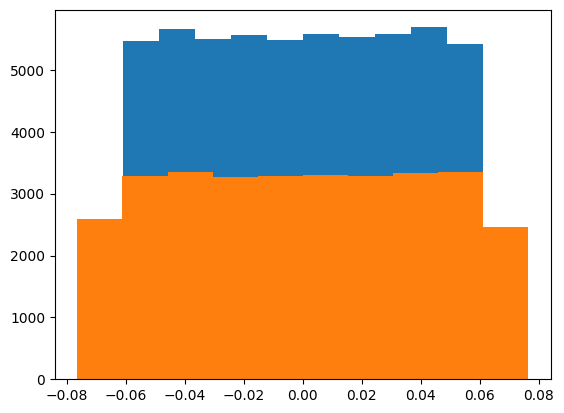

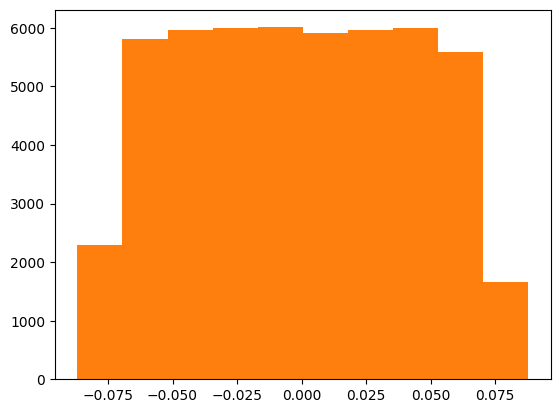

<Figure size 640x480 with 0 Axes>

Epoch 1/2
1/1 [==============================] - 11s 11s/step - loss: 2.3224 - accuracy: 0.0676 - val_loss: 2.2166 - val_accuracy: 0.1419 - seq2seq_val_loss: 2.2351 - seq2seq_val_accuracy: 0.1211
Epoch 2/2
1/1 [==============================] - 0s 456ms/step - loss: 2.2166 - accuracy: 0.1419 - val_loss: 2.2028 - val_accuracy: 0.1802 - seq2seq_val_loss: 2.2223 - seq2seq_val_accuracy: 0.1337


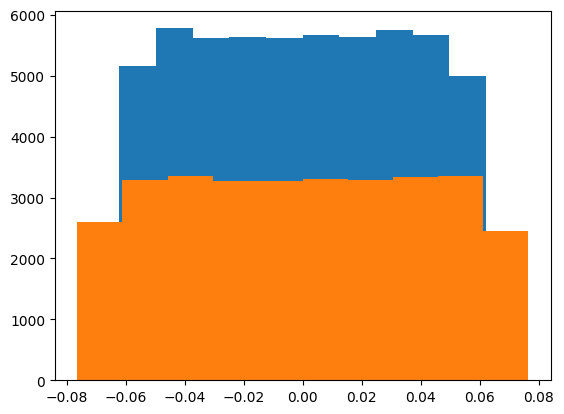

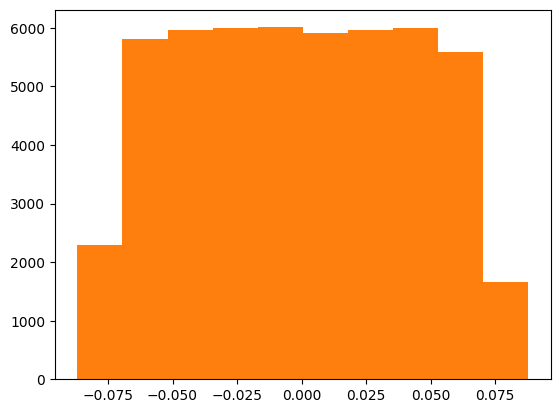

Epoch 1/5
1/1 [==============================] - 9s 9s/step - loss: 2.2028 - accuracy: 0.1802 - val_loss: 2.1419 - val_accuracy: 0.1847 - seq2seq_val_loss: 2.1638 - seq2seq_val_accuracy: 0.1535
Epoch 2/5
1/1 [==============================] - 0s 466ms/step - loss: 2.1419 - accuracy: 0.1847 - val_loss: 2.1813 - val_accuracy: 0.1622 - seq2seq_val_loss: 2.2046 - seq2seq_val_accuracy: 0.1383
Epoch 3/5
1/1 [==============================] - 0s 469ms/step - loss: 2.1813 - accuracy: 0.1622 - val_loss: 2.2815 - val_accuracy: 0.1577 - seq2seq_val_loss: 2.3078 - seq2seq_val_accuracy: 0.1159
Epoch 4/5
1/1 [==============================] - 0s 440ms/step - loss: 2.2815 - accuracy: 0.1577 - val_loss: 2.1146 - val_accuracy: 0.2117 - seq2seq_val_loss: 2.1417 - seq2seq_val_accuracy: 0.1673
Epoch 5/5
1/1 [==============================] - 0s 436ms/step - loss: 2.1146 - accuracy: 0.2117 - val_loss: 2.1761 - val_accuracy: 0.2162 - seq2seq_val_loss: 2.2060 - seq2seq_val_accuracy: 0.1715


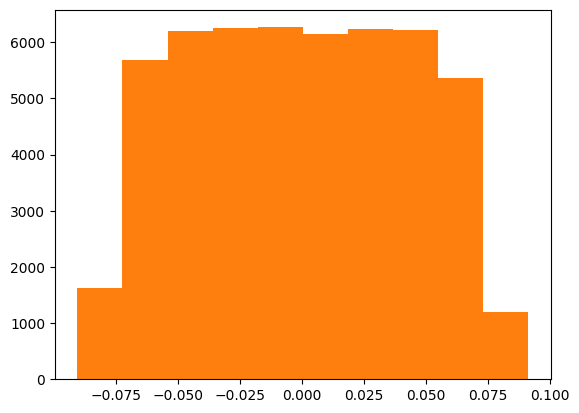

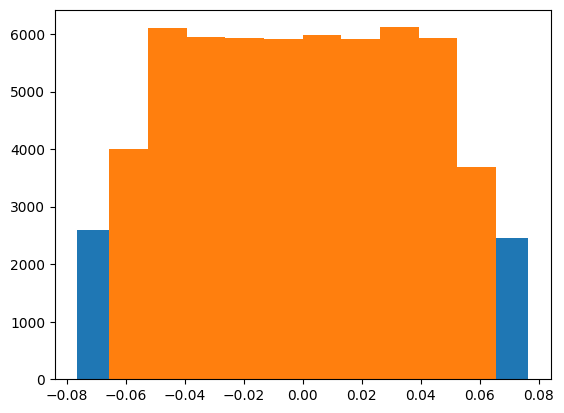

In [27]:
chain_model, chain_enc, t_hist = transfer_train_chain(
                                    train_model, inf_enc,
                                    inf_dec, [X1, X3, X4],
                                    [X1_prior, X3_prior, X4_prior],
                                    [y1, y3, y4],
                                    X2, X2_prior, y2,
                                    pre_val=[([X1, X1_prior], y1), ([X3, X3_prior], y3), ([X4, X4_prior], y4)],
                                    tar_val=([X2, X2_prior], y2),
                                    pretrain_epochs=pre_epochs, conv_epochs=c_epochs,
                                    target_epochs=ft_epochs)

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(t_hist.history['loss'], color='blue', label='Train')
# ax1.plot(t_hist.history['val_loss'], color='orange', label='Validation')
ax1.plot(t_hist.history['seq2seq_val_loss'], color='red', label='Seq2seq Validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(t_hist.history['accuracy'], color='blue', label='Train')
# ax2.plot(t_hist.history['val_accuracy'], color='orange', label='Validation')
ax2.plot(t_hist.history['seq2seq_val_accuracy'], color='red', label='Seq2seq Validation')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()


plt.show()

##### KFold

In [26]:
from train.transfer_training import transfer_chain_kfold

In [27]:
chain_X_pre = [X1, X3, X4]
chain_X_prior_pre = [X1_prior, X3_prior, X4_prior]
chain_y_pre = [y1, y3, y4]

chain_X_tar = X2
chain_X_prior_tar = X2_prior
chain_y_tar = y2

t_hist_k, y_pred_k, y_test_k = transfer_chain_kfold(train_model, inf_enc, inf_dec,
                                                    chain_X_pre, chain_X_prior_pre, chain_y_pre,
                                                    chain_X_tar, chain_X_prior_tar, chain_y_tar,
                                                    num_folds=num_folds, pretrain_epochs=pre_epochs,
                                                    conv_epochs=c_epochs, target_epochs=ft_epochs)

===== Fold 1 =====
Epoch 1/3
1/1 [==============================] - 8s 8s/step - loss: 2.3454 - accuracy: 0.0904 - val_loss: 2.2497 - val_accuracy: 0.0889 - seq2seq_val_loss: 2.2480 - seq2seq_val_accuracy: 0.0833
Epoch 2/3
1/1 [==============================] - 0s 237ms/step - loss: 2.2523 - accuracy: 0.1473 - val_loss: 2.2386 - val_accuracy: 0.1111 - seq2seq_val_loss: 2.2385 - seq2seq_val_accuracy: 0.0926
Epoch 3/3
1/1 [==============================] - 0s 234ms/step - loss: 2.1996 - accuracy: 0.1550 - val_loss: 2.2441 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.2458 - seq2seq_val_accuracy: 0.1296
Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.2115 - accuracy: 0.1506 - val_loss: 2.2125 - val_accuracy: 0.0833 - seq2seq_val_loss: 2.2162 - seq2seq_val_accuracy: 0.0635
Epoch 2/2
1/1 [==============================] - 0s 205ms/step - loss: 2.2075 - accuracy: 0.1580 - val_loss: 2.2119 - val_accuracy: 0.0833 - seq2seq_val_loss: 2.2156 - seq2seq_val_accuracy: 0.0635
Ep

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 410ms/step - loss: 2.1848 - accuracy: 0.1870 - val_loss: 2.1494 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1539 - seq2seq_val_accuracy: 0.0286
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 7s 7s/step - loss: 2.1708 - accuracy: 0.1951 - val_loss: 2.1554 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1613 - seq2seq_val_accuracy: 0.1714
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 446ms/step - loss: 2.1425 - accuracy: 0.2195 - val_loss: 2.1976 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.2050 - seq2seq_val_accuracy: 0.1714
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 429ms/step - loss: 2.1186 - accuracy: 0.2033 - val_loss: 2.2399 - val_accuracy: 0.0667 - seq2seq_val_loss: 2.2485 - seq2seq_val_accuracy: 0.1429


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.1949 - accuracy: 0.1303 - val_loss: 2.1347 - val_accuracy: 0.1556 - seq2seq_val_loss: 2.1417 - seq2seq_val_accuracy: 0.0873
Epoch 2/2
1/1 [==============================] - 1s 688ms/step - loss: 2.1805 - accuracy: 0.1504 - val_loss: 2.1608 - val_accuracy: 0.2222 - seq2seq_val_loss: 2.1678 - seq2seq_val_accuracy: 0.1190
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1707 - accuracy: 0.1579 - val_loss: 2.1815 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.1898 - seq2seq_val_accuracy: 0.1238
Epoch 2/5
1/1 [==============================] - 1s 800ms/step - loss: 2.1608 - accuracy: 0.1629 - val_loss: 2.1734 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.1833 - seq2seq_val_accuracy: 0.1238
Epoch 3/5
1/1 [==============================] - 1s 814ms/step - loss: 2.1459 - accuracy: 0.1654 - val_loss: 2.1555 - val_accuracy: 0.2222 - seq2seq_val_loss: 2.1670 - seq2seq_val_accuracy: 0.1402
Epoch 4/5
1/1 [======

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 422ms/step - loss: 2.1700 - accuracy: 0.1707 - val_loss: 2.2289 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2263 - seq2seq_val_accuracy: 0.0000e+00
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 6s 6s/step - loss: 2.1584 - accuracy: 0.1870 - val_loss: 2.2347 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2332 - seq2seq_val_accuracy: 0.0000e+00
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 499ms/step - loss: 2.1367 - accuracy: 0.2683 - val_loss: 2.2416 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2411 - seq2seq_val_accuracy: 0.0000e+00
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 486ms/step - loss: 2.1138 - accuracy: 0.2276 - val_loss: 2.2427 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2431 - seq2seq_val_accuracy: 0.0000e+00


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 2.1911 - accuracy: 0.1303 - val_loss: 2.1225 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1287 - seq2seq_val_accuracy: 0.0714
Epoch 2/2
1/1 [==============================] - 1s 711ms/step - loss: 2.1770 - accuracy: 0.1404 - val_loss: 2.1429 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.1493 - seq2seq_val_accuracy: 0.1032
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1664 - accuracy: 0.1454 - val_loss: 2.1742 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.1822 - seq2seq_val_accuracy: 0.1079
Epoch 2/5
1/1 [==============================] - 1s 772ms/step - loss: 2.1554 - accuracy: 0.1604 - val_loss: 2.1963 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.2058 - seq2seq_val_accuracy: 0.1265
Epoch 3/5
1/1 [==============================] - 1s 838ms/step - loss: 2.1466 - accuracy: 0.1855 - val_loss: 2.1760 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.1870 - seq2seq_val_accuracy: 0.1106
Epoch 4/5
1/1 [======

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 535ms/step - loss: 2.1321 - accuracy: 0.2520 - val_loss: 2.2661 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2682 - seq2seq_val_accuracy: 0.0000e+00
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 536ms/step - loss: 2.1018 - accuracy: 0.2602 - val_loss: 2.2729 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2757 - seq2seq_val_accuracy: 0.0000e+00


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.2038 - accuracy: 0.1479 - val_loss: 2.1386 - val_accuracy: 0.1111 - seq2seq_val_loss: 2.1484 - seq2seq_val_accuracy: 0.0556
Epoch 2/2
1/1 [==============================] - 1s 708ms/step - loss: 2.1843 - accuracy: 0.1378 - val_loss: 2.1683 - val_accuracy: 0.1556 - seq2seq_val_loss: 2.1785 - seq2seq_val_accuracy: 0.1106
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1766 - accuracy: 0.1654 - val_loss: 2.2122 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.2245 - seq2seq_val_accuracy: 0.1079
Epoch 2/5
1/1 [==============================] - 1s 855ms/step - loss: 2.1658 - accuracy: 0.1454 - val_loss: 2.1983 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.2120 - seq2seq_val_accuracy: 0.1238
Epoch 3/5
1/1 [==============================] - 1s 855ms/step - loss: 2.1476 - accuracy: 0.1654 - val_loss: 2.1611 - val_accuracy: 0.2222 - seq2seq_val_loss: 2.1758 - seq2seq_val_accuracy: 0.1190
Epoch 4/5
1/1 [======

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 505ms/step - loss: 2.1018 - accuracy: 0.2520 - val_loss: 2.1693 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1751 - seq2seq_val_accuracy: 0.1667


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.1800 - accuracy: 0.1454 - val_loss: 2.2447 - val_accuracy: 0.0889 - seq2seq_val_loss: 2.2526 - seq2seq_val_accuracy: 0.0963
Epoch 2/2
1/1 [==============================] - 1s 745ms/step - loss: 2.1640 - accuracy: 0.1704 - val_loss: 2.2163 - val_accuracy: 0.0889 - seq2seq_val_loss: 2.2238 - seq2seq_val_accuracy: 0.0704
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1595 - accuracy: 0.1704 - val_loss: 2.2175 - val_accuracy: 0.0889 - seq2seq_val_loss: 2.2265 - seq2seq_val_accuracy: 0.0870
Epoch 2/5
1/1 [==============================] - 1s 910ms/step - loss: 2.1468 - accuracy: 0.1754 - val_loss: 2.2336 - val_accuracy: 0.1111 - seq2seq_val_loss: 2.2442 - seq2seq_val_accuracy: 0.1259
Epoch 3/5
1/1 [==============================] - 1s 910ms/step - loss: 2.1316 - accuracy: 0.2130 - val_loss: 2.2297 - val_accuracy: 0.0889 - seq2seq_val_loss: 2.2417 - seq2seq_val_accuracy: 0.1037
Epoch 4/5
1/1 [======

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.1844 - accuracy: 0.1479 - val_loss: 2.1342 - val_accuracy: 0.1111 - seq2seq_val_loss: 2.1431 - seq2seq_val_accuracy: 0.1012
Epoch 2/2
1/1 [==============================] - 1s 848ms/step - loss: 2.1717 - accuracy: 0.1529 - val_loss: 2.1305 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1395 - seq2seq_val_accuracy: 0.1037
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1641 - accuracy: 0.1629 - val_loss: 2.1270 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1375 - seq2seq_val_accuracy: 0.0914
Epoch 2/5
1/1 [==============================] - 1s 899ms/step - loss: 2.1534 - accuracy: 0.1679 - val_loss: 2.1239 - val_accuracy: 0.0889 - seq2seq_val_loss: 2.1358 - seq2seq_val_accuracy: 0.1000
Epoch 3/5
1/1 [==============================] - 1s 894ms/step - loss: 2.1357 - accuracy: 0.2155 - val_loss: 2.1096 - val_accuracy: 0.1111 - seq2seq_val_loss: 2.1233 - seq2seq_val_accuracy: 0.1346
Epoch 4/5
1/1 [======

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.1966 - accuracy: 0.1429 - val_loss: 2.1210 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1307 - seq2seq_val_accuracy: 0.1136
Epoch 2/2
1/1 [==============================] - 1s 768ms/step - loss: 2.1721 - accuracy: 0.1504 - val_loss: 2.1119 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1215 - seq2seq_val_accuracy: 0.0938
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1610 - accuracy: 0.1679 - val_loss: 2.1218 - val_accuracy: 0.1111 - seq2seq_val_loss: 2.1331 - seq2seq_val_accuracy: 0.0969
Epoch 2/5
1/1 [==============================] - 1s 902ms/step - loss: 2.1625 - accuracy: 0.1704 - val_loss: 2.1188 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1315 - seq2seq_val_accuracy: 0.0944
Epoch 3/5
1/1 [==============================] - 1s 881ms/step - loss: 2.1413 - accuracy: 0.1980 - val_loss: 2.1101 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.1243 - seq2seq_val_accuracy: 0.1691
Epoch 4/5
1/1 [======

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 988ms/step - loss: 2.3487 - accuracy: 0.0462 - val_loss: 2.3053 - val_accuracy: 0.0952 - seq2seq_val_loss: 2.3061 - seq2seq_val_accuracy: 0.0741
Epoch 3/3
1/1 [==============================] - 1s 976ms/step - loss: 2.2587 - accuracy: 0.1487 - val_loss: 2.2896 - val_accuracy: 0.1190 - seq2seq_val_loss: 2.2913 - seq2seq_val_accuracy: 0.0741
Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.2357 - accuracy: 0.1324 - val_loss: 2.2382 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.2391 - seq2seq_val_accuracy: 0.0926
Epoch 2/2
1/1 [==============================] - 1s 876ms/step - loss: 2.2246 - accuracy: 0.1446 - val_loss: 2.2363 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.2371 - seq2seq_val_accuracy: 0.1420
Epoch 1/3
1/1 [==============================] - 8s 8s/step - loss: 2.2141 - accuracy: 0.1642 - val_loss: 2.2297 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.2315 - seq2seq_val_accuracy: 0.1667
Epoch 2/3
1/1 [================

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 495ms/step - loss: 2.1771 - accuracy: 0.1951 - val_loss: 2.1188 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1206 - seq2seq_val_accuracy: 0.0556
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 7s 7s/step - loss: 2.1563 - accuracy: 0.2358 - val_loss: 2.1803 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.1826 - seq2seq_val_accuracy: 0.0000e+00
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 599ms/step - loss: 2.1206 - accuracy: 0.1707 - val_loss: 2.2689 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2714 - seq2seq_val_accuracy: 0.0000e+00
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 567ms/step - loss: 2.0839 - accuracy: 0.1789 - val_loss: 2.3420 - val_accuracy: 0.0667 - seq2seq_val_loss: 2.3449 - seq2seq_val_accuracy: 0.1667


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.1834 - accuracy: 0.1479 - val_loss: 2.1504 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.1608 - seq2seq_val_accuracy: 0.1700
Epoch 2/2
1/1 [==============================] - 1s 858ms/step - loss: 2.1643 - accuracy: 0.1955 - val_loss: 2.1746 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1848 - seq2seq_val_accuracy: 0.1164
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1536 - accuracy: 0.1754 - val_loss: 2.1893 - val_accuracy: 0.0889 - seq2seq_val_loss: 2.2013 - seq2seq_val_accuracy: 0.1058
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 2.1369 - accuracy: 0.1855 - val_loss: 2.1730 - val_accuracy: 0.1556 - seq2seq_val_loss: 2.1871 - seq2seq_val_accuracy: 0.1104
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 2.1142 - accuracy: 0.2632 - val_loss: 2.1571 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.1731 - seq2seq_val_accuracy: 0.1581
Epoch 4/5
1/1 [============

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 508ms/step - loss: 2.1703 - accuracy: 0.1707 - val_loss: 2.2206 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2283 - seq2seq_val_accuracy: 0.0000e+00
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 7s 7s/step - loss: 2.1477 - accuracy: 0.1707 - val_loss: 2.2401 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2490 - seq2seq_val_accuracy: 0.0000e+00
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 589ms/step - loss: 2.1160 - accuracy: 0.1789 - val_loss: 2.2649 - val_accuracy: 0.0667 - seq2seq_val_loss: 2.2749 - seq2seq_val_accuracy: 0.1667
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 581ms/step - loss: 2.0840 - accuracy: 0.2114 - val_loss: 2.2866 - val_accuracy: 0.0667 - seq2seq_val_loss: 2.2973 - seq2seq_val_accuracy: 0.1667


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.1868 - accuracy: 0.1729 - val_loss: 2.1639 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1735 - seq2seq_val_accuracy: 0.1164
Epoch 2/2
1/1 [==============================] - 1s 859ms/step - loss: 2.1694 - accuracy: 0.1529 - val_loss: 2.1724 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.1817 - seq2seq_val_accuracy: 0.1164
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1557 - accuracy: 0.1579 - val_loss: 2.1918 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.2022 - seq2seq_val_accuracy: 0.1243
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 2.1363 - accuracy: 0.2331 - val_loss: 2.2014 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.2132 - seq2seq_val_accuracy: 0.1362
Epoch 3/5
1/1 [==============================] - 1s 986ms/step - loss: 2.1179 - accuracy: 0.2155 - val_loss: 2.1995 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.2130 - seq2seq_val_accuracy: 0.1541
Epoch 4/5
1/1 [=========

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 495ms/step - loss: 2.1880 - accuracy: 0.1545 - val_loss: 2.1272 - val_accuracy: 0.2667 - seq2seq_val_loss: 2.1268 - seq2seq_val_accuracy: 0.1111
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 6s 6s/step - loss: 2.1583 - accuracy: 0.1626 - val_loss: 2.1776 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.1787 - seq2seq_val_accuracy: 0.0833
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 587ms/step - loss: 2.1163 - accuracy: 0.2033 - val_loss: 2.2631 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2658 - seq2seq_val_accuracy: 0.0278
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 571ms/step - loss: 2.0780 - accuracy: 0.2114 - val_loss: 2.3315 - val_accuracy: 0.0667 - seq2seq_val_loss: 2.3355 - seq2seq_val_accuracy: 0.1667


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 2.1990 - accuracy: 0.1353 - val_loss: 2.1537 - val_accuracy: 0.2000 - seq2seq_val_loss: 2.1631 - seq2seq_val_accuracy: 0.1541
Epoch 2/2
1/1 [==============================] - 1s 884ms/step - loss: 2.1709 - accuracy: 0.1729 - val_loss: 2.1805 - val_accuracy: 0.2222 - seq2seq_val_loss: 2.1898 - seq2seq_val_accuracy: 0.1720
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1583 - accuracy: 0.1529 - val_loss: 2.2133 - val_accuracy: 0.2222 - seq2seq_val_loss: 2.2240 - seq2seq_val_accuracy: 0.2407
Epoch 2/5
1/1 [==============================] - 1s 963ms/step - loss: 2.1445 - accuracy: 0.1830 - val_loss: 2.1984 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.2108 - seq2seq_val_accuracy: 0.1806
Epoch 3/5
1/1 [==============================] - 1s 991ms/step - loss: 2.1225 - accuracy: 0.2005 - val_loss: 2.1604 - val_accuracy: 0.1778 - seq2seq_val_loss: 2.1749 - seq2seq_val_accuracy: 0.1263
Epoch 4/5
1/1 [======

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 563ms/step - loss: 2.1619 - accuracy: 0.1825 - val_loss: 2.2563 - val_accuracy: 0.0833 - seq2seq_val_loss: 2.2592 - seq2seq_val_accuracy: 0.0625
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 6s 6s/step - loss: 2.1405 - accuracy: 0.1667 - val_loss: 2.2346 - val_accuracy: 0.0833 - seq2seq_val_loss: 2.2386 - seq2seq_val_accuracy: 0.0625
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 675ms/step - loss: 2.1039 - accuracy: 0.2619 - val_loss: 2.2127 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.2176 - seq2seq_val_accuracy: 0.1875
Epoch 3/3
1/1 [==============================] - 1s 639ms/step - loss: 2.0596 - accuracy: 0.2302 - val_loss: 2.1936 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1993 - seq2seq_val_accuracy: 0.1875
Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 2.1851 - accuracy: 0.1529 - val_loss: 2.1640 - val_accuracy: 0.2444 - seq2seq_val_loss: 2.1743 - seq2seq_val_accuracy: 0.1931
Epoch 2/2
1/1 [==============================] - 1s 945ms/step - loss: 2.1708 - accuracy: 0.1930 - val_loss: 2.1655 - val_accuracy: 0.2222 - seq2seq_val_loss: 2.1759 - seq2seq_val_accuracy: 0.1974
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1590 - accuracy: 0.1754 - val_loss: 2.1600 - val_accuracy: 0.1556 - seq2seq_val_loss: 2.1719 - seq2seq_val_accuracy: 0.1407
Epoch 2/5
1/1 [================

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 694ms/step - loss: 2.1290 - accuracy: 0.2222 - val_loss: 2.3573 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.3632 - seq2seq_val_accuracy: 0.1667
Epoch 3/3
1/1 [==============================] - 1s 660ms/step - loss: 2.0909 - accuracy: 0.2381 - val_loss: 2.3811 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.3882 - seq2seq_val_accuracy: 0.1667
Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 2.2058 - accuracy: 0.1343 - val_loss: 2.2348 - val_accuracy: 0.2619 - seq2seq_val_loss: 2.2409 - seq2seq_val_accuracy: 0.2296
Epoch 2/2
1/1 [==============================] - 1s 973ms/step - loss: 2.1790 - accuracy: 0.1443 - val_loss: 2.2099 - val_accuracy: 0.1905 - seq2seq_val_loss: 2.2161 - seq2seq_val_accuracy: 0.1630
Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 2.1642 - accuracy: 0.1667 - val_loss: 2.1815 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1895 - seq2seq_val_accuracy: 0.1444
Epoch 2/5
1/1 [================

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 2.2108 - accuracy: 0.1468 - val_loss: 2.2258 - val_accuracy: 0.1905 - seq2seq_val_loss: 2.2359 - seq2seq_val_accuracy: 0.1630
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 2.1747 - accuracy: 0.1443 - val_loss: 2.1889 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1987 - seq2seq_val_accuracy: 0.1185
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1624 - accuracy: 0.1741 - val_loss: 2.1851 - val_accuracy: 0.1905 - seq2seq_val_loss: 2.1966 - seq2seq_val_accuracy: 0.1185
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 2.1414 - accuracy: 0.1791 - val_loss: 2.1854 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1990 - seq2seq_val_accuracy: 0.1574
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 2.1301 - accuracy: 0.1866 - val_loss: 2.2135 - val_accuracy: 0.1905 - seq2seq_val_loss: 2.2286 - seq2seq_val_accuracy: 0.1759
Epoch 4/5
1/1 [===============

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 577ms/step - loss: 2.1642 - accuracy: 0.1587 - val_loss: 2.1634 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1710 - seq2seq_val_accuracy: 0.1429
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 6s 6s/step - loss: 2.1353 - accuracy: 0.2143 - val_loss: 2.2093 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.2188 - seq2seq_val_accuracy: 0.1429
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 687ms/step - loss: 2.0960 - accuracy: 0.1984 - val_loss: 2.2606 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.2720 - seq2seq_val_accuracy: 0.1429
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 664ms/step - loss: 2.0584 - accuracy: 0.2143 - val_loss: 2.2622 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.2751 - seq2seq_val_accuracy: 0.1429


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.2006 - accuracy: 0.1468 - val_loss: 2.1262 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1387 - seq2seq_val_accuracy: 0.1667
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 2.1717 - accuracy: 0.1592 - val_loss: 2.1201 - val_accuracy: 0.2143 - seq2seq_val_loss: 2.1325 - seq2seq_val_accuracy: 0.1667
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1639 - accuracy: 0.1692 - val_loss: 2.1444 - val_accuracy: 0.1190 - seq2seq_val_loss: 2.1576 - seq2seq_val_accuracy: 0.1389
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 2.1462 - accuracy: 0.1766 - val_loss: 2.1407 - val_accuracy: 0.1429 - seq2seq_val_loss: 2.1558 - seq2seq_val_accuracy: 0.1778
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 2.1259 - accuracy: 0.1915 - val_loss: 2.1070 - val_accuracy: 0.2381 - seq2seq_val_loss: 2.1240 - seq2seq_val_accuracy: 0.2194
Epoch 4/5
1/1 [===============

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 569ms/step - loss: 2.1710 - accuracy: 0.1746 - val_loss: 2.2068 - val_accuracy: 0.0833 - seq2seq_val_loss: 2.2176 - seq2seq_val_accuracy: 0.0000e+00
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 7s 7s/step - loss: 2.1466 - accuracy: 0.1667 - val_loss: 2.2563 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2687 - seq2seq_val_accuracy: 0.0000e+00
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 693ms/step - loss: 2.1120 - accuracy: 0.1667 - val_loss: 2.3113 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.3252 - seq2seq_val_accuracy: 0.0000e+00
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 658ms/step - loss: 2.0757 - accuracy: 0.2143 - val_loss: 2.3284 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.3436 - seq2seq_val_accuracy: 0.0714


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.1877 - accuracy: 0.1443 - val_loss: 2.1384 - val_accuracy: 0.2143 - seq2seq_val_loss: 2.1422 - seq2seq_val_accuracy: 0.1806
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 2.1677 - accuracy: 0.1866 - val_loss: 2.1391 - val_accuracy: 0.1429 - seq2seq_val_loss: 2.1428 - seq2seq_val_accuracy: 0.0926
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1566 - accuracy: 0.1642 - val_loss: 2.1412 - val_accuracy: 0.1190 - seq2seq_val_loss: 2.1464 - seq2seq_val_accuracy: 0.1389
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 2.1380 - accuracy: 0.1965 - val_loss: 2.1405 - val_accuracy: 0.1905 - seq2seq_val_loss: 2.1472 - seq2seq_val_accuracy: 0.2204
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 2.1164 - accuracy: 0.2612 - val_loss: 2.1234 - val_accuracy: 0.1429 - seq2seq_val_loss: 2.1316 - seq2seq_val_accuracy: 0.1556
Epoch 4/5
1/1 [===============

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 580ms/step - loss: 2.1787 - accuracy: 0.1587 - val_loss: 2.2041 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2129 - seq2seq_val_accuracy: 0.0000e+00
Epoch 1/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 7s 7s/step - loss: 2.1515 - accuracy: 0.1984 - val_loss: 2.2312 - val_accuracy: 0.0000e+00 - seq2seq_val_loss: 2.2413 - seq2seq_val_accuracy: 0.0000e+00
Epoch 2/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 690ms/step - loss: 2.1139 - accuracy: 0.1984 - val_loss: 2.2550 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.2666 - seq2seq_val_accuracy: 0.1429
Epoch 3/3


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 1s 661ms/step - loss: 2.0699 - accuracy: 0.2143 - val_loss: 2.2637 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.2771 - seq2seq_val_accuracy: 0.1429


f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.2193 - accuracy: 0.1493 - val_loss: 2.1437 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1528 - seq2seq_val_accuracy: 0.1667
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 2.1856 - accuracy: 0.1493 - val_loss: 2.1546 - val_accuracy: 0.1429 - seq2seq_val_loss: 2.1638 - seq2seq_val_accuracy: 0.1528
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.1750 - accuracy: 0.1617 - val_loss: 2.1509 - val_accuracy: 0.1667 - seq2seq_val_loss: 2.1614 - seq2seq_val_accuracy: 0.1889
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 2.1592 - accuracy: 0.1866 - val_loss: 2.1409 - val_accuracy: 0.1190 - seq2seq_val_loss: 2.1527 - seq2seq_val_accuracy: 0.1528
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 2.1324 - accuracy: 0.2338 - val_loss: 2.1056 - val_accuracy: 0.1429 - seq2seq_val_loss: 2.1186 - seq2seq_val_accuracy: 0.1528
Epoch 4/5
1/1 [===============

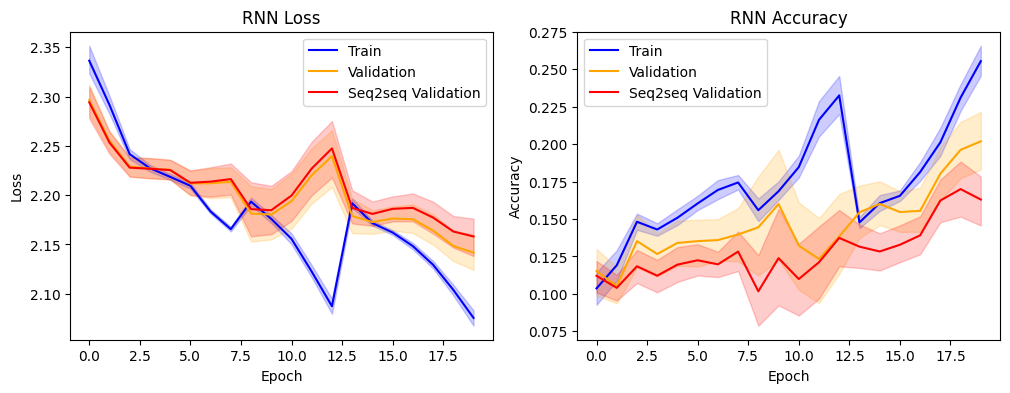

In [35]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(t_hist_k, epochs=len(chain_X_pre)*(pre_epochs + c_epochs) + ft_epochs)